In [1]:
#Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
#import os

In [2]:
#Create dataframes from all the datafiles
data = pd.read_csv('./inputs/kolkata-pm2.5-calibrated.csv',parse_dates=True).set_index('time')
trafficdata = pd.read_csv('./inputs/kolkata-traffic-transformed.csv',parse_dates=True)
loc_data = pd.read_csv('./inputs/kolkata-stations.csv')
traf_loc = pd.read_csv('./inputs/traffic-loc.csv')


In [3]:

data.columns

Index(['Ballygunge Phari, Kolkata - Cleair', 'Ballygunge, Kolkata - WBPCB',
       'Behala Buro Shibtala, Kolkata - Cleair',
       'Beleghata Building More, Kolkata - Cleair',
       'Belur Math, Howrah - WBPCB', 'Bidhannagar, Kolkata - WBPCB',
       'Ekbalpur, Kolkata - Cleair', 'Fort William, Kolkata - WBPCB',
       'Garia, Kolkata - Cleair', 'Ghusuri, Howrah - WBPCB',
       'Jadavpur, Kolkata - WBPCB', 'Padmapukur, Howrah - WBPCB',
       'Rabindra Bharati University, Kolkata - Cleair',
       'Rabindra Bharati University, Kolkata - WBPCB',
       'Rabindra Sarobar, Kolkata - WBPCB',
       'Ruby More / Simla Restaurant, Kolkata - Cleair',
       'Shyam Bazar, Kolkata - Cleair', 'Taratala More, Kolkata - Cleair',
       'Topsia More, Kolkata - Cleair', 'US Diplomatic Post: Kolkata',
       'Victoria, Kolkata - WBPCB'],
      dtype='object')

In [4]:
df=data.loc[:,data.columns[pd.Series(data.columns).str.contains("WBPCB")]]

In [5]:
#Data cleaning: Remove empty columns
df.dropna(how='all',inplace=True)
df=df.join(data.loc[:,'US Diplomatic Post: Kolkata'],how='left')

In [6]:
df.interpolate(axis=1,limit_direction='both', inplace=True) 

In [7]:
df.isnull().values.any()

False

In [8]:
data

,"Ballygunge Phari, Kolkata - Cleair","Ballygunge, Kolkata - WBPCB","Behala Buro Shibtala, Kolkata - Cleair","Beleghata Building More, Kolkata - Cleair","Belur Math, Howrah - WBPCB","Bidhannagar, Kolkata - WBPCB","Ekbalpur, Kolkata - Cleair","Fort William, Kolkata - WBPCB","Garia, Kolkata - Cleair","Ghusuri, Howrah - WBPCB",...,"Padmapukur, Howrah - WBPCB","Rabindra Bharati University, Kolkata - Cleair","Rabindra Bharati University, Kolkata - WBPCB","Rabindra Sarobar, Kolkata - WBPCB","Ruby More / Simla Restaurant, Kolkata - Cleair","Shyam Bazar, Kolkata - Cleair","Taratala More, Kolkata - Cleair","Topsia More, Kolkata - Cleair",US Diplomatic Post: Kolkata,"Victoria, Kolkata - WBPCB"
time,,,,,,,,,,,,,,,,,,,,,
2019-09-01 00:00:00,NaN,14.38,NaN,NaN,32.66,2.62,NaN,28.88,NaN,36.32,...,13.04,NaN,33.38,13.12,NaN,NaN,NaN,NaN,NaN,22.27
2019-09-01 01:00:00,NaN,14.03,NaN,NaN,33.02,3.43,NaN,32.58,NaN,34.07,...,23.11,NaN,32.12,12.93,NaN,NaN,NaN,NaN,NaN,22.48
2019-09-01 02:00:00,NaN,13.87,NaN,NaN,30.97,3.17,NaN,29.87,NaN,31.60,...,17.91,NaN,24.12,12.77,NaN,NaN,NaN,NaN,NaN,19.95
2019-09-01 03:00:00,NaN,15.49,NaN,NaN,30.87,2.82,NaN,25.88,NaN,33.70,...,14.07,NaN,28.90,11.15,NaN,NaN,NaN,NaN,NaN,20.03
2019-09-01 04:00:00,NaN,16.23,NaN,NaN,35.12,2.62,NaN,21.44,NaN,38.02,...,10.77,NaN,25.62,9.82,NaN,NaN,NaN,NaN,NaN,24.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-11 01:00:00,NaN,NaN,NaN,62.332516,NaN,NaN,58.904993,NaN,45.994669,NaN,...,NaN,NaN,NaN,NaN,51.725460,61.860296,NaN,69.278150,NaN,NaN
2020-10-11 02:00:00,NaN,NaN,NaN,36.055550,NaN,NaN,61.029843,NaN,37.430921,NaN,...,NaN,NaN,NaN,NaN,42.667408,42.321342,NaN,62.758045,NaN,NaN
2020-10-11 03:00:00,NaN,NaN,98.408161,NaN,NaN,NaN,NaN,NaN,42.704372,NaN,...,NaN,NaN,NaN,NaN,34.694848,30.576945,52.164897,56.380163,NaN,NaN


In [9]:
df

,"Ballygunge, Kolkata - WBPCB","Belur Math, Howrah - WBPCB","Bidhannagar, Kolkata - WBPCB","Fort William, Kolkata - WBPCB","Ghusuri, Howrah - WBPCB","Jadavpur, Kolkata - WBPCB","Padmapukur, Howrah - WBPCB","Rabindra Bharati University, Kolkata - WBPCB","Rabindra Sarobar, Kolkata - WBPCB","Victoria, Kolkata - WBPCB",US Diplomatic Post: Kolkata
time,,,,,,,,,,,
2019-09-01 00:00:00,14.38,32.66,2.62,28.88,36.320,16.83,13.040,33.38,13.12,22.27,22.27
2019-09-01 01:00:00,14.03,33.02,3.43,32.58,34.070,17.27,23.110,32.12,12.93,22.48,22.48
2019-09-01 02:00:00,13.87,30.97,3.17,29.87,31.600,16.81,17.910,24.12,12.77,19.95,19.95
2019-09-01 03:00:00,15.49,30.87,2.82,25.88,33.700,16.44,14.070,28.90,11.15,20.03,20.03
2019-09-01 04:00:00,16.23,35.12,2.62,21.44,38.020,17.25,10.770,25.62,9.82,24.05,24.05
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-29 20:00:00,12.62,36.42,19.90,19.75,17.740,15.73,29.365,43.00,15.38,22.52,22.00
2020-09-29 21:00:00,11.97,47.10,16.65,19.26,15.755,12.25,26.175,40.10,11.38,21.92,19.00
2020-09-29 22:00:00,14.15,45.10,16.50,16.91,13.920,10.93,25.115,39.30,9.18,20.05,19.00


In [10]:
sp=data.loc[:,data.columns[pd.Series(data.columns).str.contains("Cleair")]]
sp
sp_cols=sp.columns
sp_cols

Index(['Ballygunge Phari, Kolkata - Cleair',
       'Behala Buro Shibtala, Kolkata - Cleair',
       'Beleghata Building More, Kolkata - Cleair',
       'Ekbalpur, Kolkata - Cleair', 'Garia, Kolkata - Cleair',
       'Rabindra Bharati University, Kolkata - Cleair',
       'Ruby More / Simla Restaurant, Kolkata - Cleair',
       'Shyam Bazar, Kolkata - Cleair', 'Taratala More, Kolkata - Cleair',
       'Topsia More, Kolkata - Cleair'],
      dtype='object')

In [11]:
loc_data

,column,station,city,source,latitude,longitude
0,"Ballygunge Phari, Kolkata - Cleair",Ballygunge Phari,Kolkata,Cleair,22.528145,88.365877
1,"Ballygunge, Kolkata - WBPCB",Ballygunge,Kolkata,WBPCB,22.536751,88.363802
2,"Behala Buro Shibtala, Kolkata - Cleair",Behala Buro Shibtala,Kolkata,Cleair,22.505603,88.329497
3,"Beleghata Building More, Kolkata - Cleair",Beleghata Building More,Kolkata,Cleair,22.562300,88.399900
4,"Belur Math, Howrah - WBPCB",Belur Math,Howrah,WBPCB,22.629801,88.352017
5,"Bidhannagar, Kolkata - WBPCB",Bidhannagar,Kolkata,WBPCB,22.581570,88.410025
6,"Ekbalpur, Kolkata - Cleair",Ekbalpur,Kolkata,Cleair,22.533197,88.325678
7,"Fort William, Kolkata - WBPCB",Fort William,Kolkata,WBPCB,22.556640,88.342674
8,"Garia, Kolkata - Cleair",Garia,Kolkata,Cleair,22.466000,88.392800
9,"Ghusuri, Howrah - WBPCB",Ghusuri,Howrah,WBPCB,22.611968,88.347422


In [12]:
# Map traffic locations to pollution sensors
loc_data['t_name']=''
lc={'Alipore Lalbati':'Alipore_Lalbati',
 'Behala 14 No':'Behala_14_No',
 'Casurina':'Casurina',
 'Chiria More':'Chiria_More',
 'Dufferin Road':'Dufferin_Road',
 'E M Bypass Dhapa':'E_M_Bypass_Dhapa',
 'E M Bypass Patuli':'E_M_Bypass_Patuli',
 'Ganesh Avenue':'Ganesh_Avenue',
 'Girish Park':'Girish_Park',
 'Lake Flyover':'Lake_Flyover',
 'Minto Park':'Minto_Park',
 'Sinthee More':'Sinthee_More',
 'Sothern Avenue':'Southern_Avenue'}
for i in range(loc_data.shape[0]):
    m=-1
    d=float('inf')
    for j in range(traf_loc.shape[0]):
        if (loc_data.loc[i]['latitude']-traf_loc.loc[j]['latitude'])**2+(loc_data.loc[i]['longitude']-traf_loc.loc[j]['longitude'])**2<d:
            d=(loc_data.loc[i]['latitude']-traf_loc.loc[j]['latitude'])**2+(loc_data.loc[i]['longitude']-traf_loc.loc[j]['longitude'])**2
            m=j
    loc_data.at[i,'t_name']=lc[traf_loc.iloc[m]['Name']]

In [13]:
# Convert time to hours
from datetime import datetime
times=data.index
times_dict=dict()
times=sorted(times)
times_dict[times[0]]=1
i=1
v=2
while i<len(times):
    indateformate = "%Y-%m-%d %H:%M:%S"
    l=times[i-1]
    val=times[i]
    starttime = datetime.strptime(l, indateformate)
    endtime = datetime.strptime(val, indateformate)
    v+=(endtime-starttime).total_seconds()/3600
    times_dict[times[i]]=v
    i+=1

In [14]:
# Create final dataset for neural network training
final_cols = ['datetime']+list(df.columns)
final_cols.extend(['latitude','longitude','pm2.5_val','traffic_count'])
final_data = pd.DataFrame(columns=final_cols)
data.shape
final_data.shape

(0, 16)

In [15]:
data_cols=data.columns
sp_col_dict=dict()
for col in sp_cols:
    for i,c in enumerate(data_cols):
        if col==c:
            sp_col_dict[col]=i
#print(sp_col_dict)
for i in range(data.shape[0]):#data.shape[0]):
    for j in sp_col_dict.values():
        if not pd.isna(data.iloc[i,j]):
            row=[]
            row.append(times_dict[data.index[i]])
            if data.index[i] in df.index:
                row.extend(df.loc[data.index[i]])
                row.append(loc_data[loc_data["column"] == data_cols[j]]["latitude"].values[0])
                row.append(loc_data[loc_data["column"] == data_cols[j]]["longitude"].values[0])
                row.append(data.iloc[i,j])
                if loc_data[loc_data['column']==data_cols[j]]['t_name'].values[0] in trafficdata[trafficdata['starttime']==data.index[i]]['loc_name'].values:
                    row.append(trafficdata[trafficdata['starttime']==data.index[i]][trafficdata['loc_name']==loc_data[loc_data['column']==data_cols[j]]['t_name'].values[0]]['traffic_count'].values[0])
                else:
                    row.append(np.NaN)
                final_data.loc[len(final_data)]=row
final_data

/Users/apoorvaranade/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,datetime,"Ballygunge, Kolkata - WBPCB","Belur Math, Howrah - WBPCB","Bidhannagar, Kolkata - WBPCB","Fort William, Kolkata - WBPCB","Ghusuri, Howrah - WBPCB","Jadavpur, Kolkata - WBPCB","Padmapukur, Howrah - WBPCB","Rabindra Bharati University, Kolkata - WBPCB","Rabindra Sarobar, Kolkata - WBPCB","Victoria, Kolkata - WBPCB",US Diplomatic Post: Kolkata,latitude,longitude,pm2.5_val,traffic_count
0,3423.0,66.67,39.27,46.97,80.72,94.80,31.60,80.950,71.665,62.38,63.73,63.73,22.627847,88.380669,94.657220,13782.0
1,3424.0,60.73,38.00,51.48,79.86,84.47,29.50,74.320,65.500,63.07,66.50,66.50,22.627847,88.380669,100.410783,13608.0
2,3425.0,62.80,39.45,54.47,74.88,78.42,25.75,69.750,72.050,60.70,71.57,71.57,22.627847,88.380669,100.523348,13826.0
3,3426.0,62.45,33.65,50.20,71.88,75.40,21.43,66.420,64.600,54.55,66.57,66.57,22.627847,88.380669,97.843919,14395.0
4,3427.0,60.17,32.80,41.92,72.35,75.50,26.20,59.780,70.830,51.45,64.20,64.20,22.627847,88.380669,95.537202,14556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12705,9482.0,10.80,36.70,16.80,21.08,16.99,12.90,28.175,43.450,5.70,19.60,11.00,22.533197,88.325678,49.141821,NaN
12706,9482.0,10.80,36.70,16.80,21.08,16.99,12.90,28.175,43.450,5.70,19.60,11.00,22.466000,88.392800,11.804322,NaN
12707,9482.0,10.80,36.70,16.80,21.08,16.99,12.90,28.175,43.450,5.70,19.60,11.00,22.601850,88.373564,32.911969,501.0
12708,9482.0,10.80,36.70,16.80,21.08,16.99,12.90,28.175,43.450,5.70,19.60,11.00,22.512606,88.319800,35.563695,501.0


In [16]:
#Interpolate to fill in missing data
final_data.interpolate(axis=1,limit_direction='both', inplace=True)
final_data.isnull().values.any()

False

In [17]:
final_data = final_data.astype({'Ballygunge, Kolkata - WBPCB':np.float32,
                                'Belur Math, Howrah - WBPCB':np.float32,
       'Bidhannagar, Kolkata - WBPCB':np.float32, 'Fort William, Kolkata - WBPCB':np.float32,
       'Ghusuri, Howrah - WBPCB':np.float32, 'Jadavpur, Kolkata - WBPCB':np.float32,
       'Padmapukur, Howrah - WBPCB':np.float32,'pm2.5_val':np.float32,
       'Rabindra Bharati University, Kolkata - WBPCB':np.float32,
       'Rabindra Sarobar, Kolkata - WBPCB':np.float32, 'Victoria, Kolkata - WBPCB':np.float32,
       'US Diplomatic Post: Kolkata':np.float32, 'latitude':np.float32, 'longitude':np.float32,
                                'traffic_count':np.float32,'datetime': np.float32})
final_data.dtypes

datetime                                        float32
Ballygunge, Kolkata - WBPCB                     float32
Belur Math, Howrah - WBPCB                      float32
Bidhannagar, Kolkata - WBPCB                    float32
Fort William, Kolkata - WBPCB                   float32
Ghusuri, Howrah - WBPCB                         float32
Jadavpur, Kolkata - WBPCB                       float32
Padmapukur, Howrah - WBPCB                      float32
Rabindra Bharati University, Kolkata - WBPCB    float32
Rabindra Sarobar, Kolkata - WBPCB               float32
Victoria, Kolkata - WBPCB                       float32
US Diplomatic Post: Kolkata                     float32
latitude                                        float32
longitude                                       float32
pm2.5_val                                       float32
traffic_count                                   float32
dtype: object

In [18]:
# To prevent exploding gradients
final_data+=1
final_data=final_data.apply(np.log)

In [19]:
# Separate dataset into X and Y
nX=final_data.iloc[:,final_data.columns!='pm2.5_val']
nY=final_data.iloc[:,final_data.columns=='pm2.5_val']
nX.columns

Index(['datetime', 'Ballygunge, Kolkata - WBPCB', 'Belur Math, Howrah - WBPCB',
       'Bidhannagar, Kolkata - WBPCB', 'Fort William, Kolkata - WBPCB',
       'Ghusuri, Howrah - WBPCB', 'Jadavpur, Kolkata - WBPCB',
       'Padmapukur, Howrah - WBPCB',
       'Rabindra Bharati University, Kolkata - WBPCB',
       'Rabindra Sarobar, Kolkata - WBPCB', 'Victoria, Kolkata - WBPCB',
       'US Diplomatic Post: Kolkata', 'latitude', 'longitude',
       'traffic_count'],
      dtype='object')

In [20]:
nX.isnull().values.any()

False

In [21]:
# Train-test split of dataset
X_train,X_test,y_train, y_test =train_test_split(nX, nY, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape,y_train.shape

((8134, 15), (8134, 1))

In [22]:
# Neural Network Model creation and training
tf.keras.backend.clear_session()
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(15,)))
model1.add(tf.keras.layers.LayerNormalization())
model1.add(tf.keras.layers.Dense(16, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
#model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(8, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
#model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(4, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.001)))
model1.add(tf.keras.layers.Dense(1))
model1.compile(loss='mean_squared_error',metrics=tf.keras.metrics.RootMeanSquaredError(),
               optimizer=tf.keras.optimizers.Adam(clipvalue=1))
m1=model1.fit(x=X_train,y=y_train, epochs=2000, batch_size=128,validation_data=(X_val, y_val))

Epoch 1/2000
64/64 [==============================] - 0s 3ms/step - loss: 12.8384 - root_mean_squared_error: 3.5790 - val_loss: 11.2351 - val_root_mean_squared_error: 3.3476
Epoch 2/2000
64/64 [==============================] - 0s 887us/step - loss: 6.7610 - root_mean_squared_error: 2.5945 - val_loss: 2.5765 - val_root_mean_squared_error: 1.5954
Epoch 3/2000
64/64 [==============================] - 0s 872us/step - loss: 1.0611 - root_mean_squared_error: 1.0140 - val_loss: 0.5496 - val_root_mean_squared_error: 0.7183
Epoch 4/2000
64/64 [==============================] - 0s 905us/step - loss: 0.5470 - root_mean_squared_error: 0.7167 - val_loss: 0.5228 - val_root_mean_squared_error: 0.6999
Epoch 5/2000
64/64 [==============================] - 0s 858us/step - loss: 0.5248 - root_mean_squared_error: 0.7015 - val_loss: 0.4995 - val_root_mean_squared_error: 0.6834
Epoch 6/2000
64/64 [==============================] - 0s 852us/step - loss: 0.5001 - root_mean_squared_error: 0.6839 - val_loss: 0

Epoch 48/2000
64/64 [==============================] - 0s 859us/step - loss: 0.2724 - root_mean_squared_error: 0.4931 - val_loss: 0.2548 - val_root_mean_squared_error: 0.4749
Epoch 49/2000
64/64 [==============================] - 0s 875us/step - loss: 0.2707 - root_mean_squared_error: 0.4914 - val_loss: 0.2520 - val_root_mean_squared_error: 0.4720
Epoch 50/2000
64/64 [==============================] - 0s 900us/step - loss: 0.2676 - root_mean_squared_error: 0.4882 - val_loss: 0.2550 - val_root_mean_squared_error: 0.4752
Epoch 51/2000
64/64 [==============================] - 0s 918us/step - loss: 0.2671 - root_mean_squared_error: 0.4878 - val_loss: 0.2477 - val_root_mean_squared_error: 0.4674
Epoch 52/2000
64/64 [==============================] - 0s 935us/step - loss: 0.2650 - root_mean_squared_error: 0.4857 - val_loss: 0.2472 - val_root_mean_squared_error: 0.4670
Epoch 53/2000
64/64 [==============================] - 0s 886us/step - loss: 0.2630 - root_mean_squared_error: 0.4837 - val_l

Epoch 95/2000
64/64 [==============================] - 0s 845us/step - loss: 0.2457 - root_mean_squared_error: 0.4717 - val_loss: 0.2291 - val_root_mean_squared_error: 0.4538
Epoch 96/2000
64/64 [==============================] - 0s 848us/step - loss: 0.2455 - root_mean_squared_error: 0.4716 - val_loss: 0.2336 - val_root_mean_squared_error: 0.4588
Epoch 97/2000
64/64 [==============================] - 0s 845us/step - loss: 0.2472 - root_mean_squared_error: 0.4734 - val_loss: 0.2345 - val_root_mean_squared_error: 0.4598
Epoch 98/2000
64/64 [==============================] - 0s 860us/step - loss: 0.2452 - root_mean_squared_error: 0.4715 - val_loss: 0.2273 - val_root_mean_squared_error: 0.4521
Epoch 99/2000
64/64 [==============================] - 0s 867us/step - loss: 0.2447 - root_mean_squared_error: 0.4710 - val_loss: 0.2274 - val_root_mean_squared_error: 0.4523
Epoch 100/2000
64/64 [==============================] - 0s 923us/step - loss: 0.2448 - root_mean_squared_error: 0.4711 - val_

64/64 [==============================] - 0s 857us/step - loss: 0.2401 - root_mean_squared_error: 0.4688 - val_loss: 0.2262 - val_root_mean_squared_error: 0.4537
Epoch 142/2000
64/64 [==============================] - 0s 857us/step - loss: 0.2397 - root_mean_squared_error: 0.4684 - val_loss: 0.2233 - val_root_mean_squared_error: 0.4505
Epoch 143/2000
64/64 [==============================] - 0s 852us/step - loss: 0.2397 - root_mean_squared_error: 0.4685 - val_loss: 0.2266 - val_root_mean_squared_error: 0.4542
Epoch 144/2000
64/64 [==============================] - 0s 847us/step - loss: 0.2393 - root_mean_squared_error: 0.4681 - val_loss: 0.2234 - val_root_mean_squared_error: 0.4508
Epoch 145/2000
64/64 [==============================] - 0s 838us/step - loss: 0.2398 - root_mean_squared_error: 0.4687 - val_loss: 0.2263 - val_root_mean_squared_error: 0.4540
Epoch 146/2000
64/64 [==============================] - 0s 842us/step - loss: 0.2402 - root_mean_squared_error: 0.4691 - val_loss: 0.22

64/64 [==============================] - 0s 859us/step - loss: 0.2375 - root_mean_squared_error: 0.4674 - val_loss: 0.2205 - val_root_mean_squared_error: 0.4489
Epoch 188/2000
64/64 [==============================] - 0s 855us/step - loss: 0.2356 - root_mean_squared_error: 0.4654 - val_loss: 0.2249 - val_root_mean_squared_error: 0.4538
Epoch 189/2000
64/64 [==============================] - 0s 848us/step - loss: 0.2358 - root_mean_squared_error: 0.4657 - val_loss: 0.2201 - val_root_mean_squared_error: 0.4486
Epoch 190/2000
64/64 [==============================] - 0s 851us/step - loss: 0.2358 - root_mean_squared_error: 0.4657 - val_loss: 0.2207 - val_root_mean_squared_error: 0.4493
Epoch 191/2000
64/64 [==============================] - 0s 850us/step - loss: 0.2367 - root_mean_squared_error: 0.4667 - val_loss: 0.2207 - val_root_mean_squared_error: 0.4493
Epoch 192/2000
64/64 [==============================] - 0s 847us/step - loss: 0.2350 - root_mean_squared_error: 0.4649 - val_loss: 0.21

64/64 [==============================] - 0s 855us/step - loss: 0.2327 - root_mean_squared_error: 0.4634 - val_loss: 0.2180 - val_root_mean_squared_error: 0.4472
Epoch 234/2000
64/64 [==============================] - 0s 863us/step - loss: 0.2320 - root_mean_squared_error: 0.4626 - val_loss: 0.2194 - val_root_mean_squared_error: 0.4489
Epoch 235/2000
64/64 [==============================] - 0s 852us/step - loss: 0.2319 - root_mean_squared_error: 0.4625 - val_loss: 0.2178 - val_root_mean_squared_error: 0.4471
Epoch 236/2000
64/64 [==============================] - 0s 857us/step - loss: 0.2328 - root_mean_squared_error: 0.4635 - val_loss: 0.2174 - val_root_mean_squared_error: 0.4467
Epoch 237/2000
64/64 [==============================] - 0s 852us/step - loss: 0.2324 - root_mean_squared_error: 0.4632 - val_loss: 0.2201 - val_root_mean_squared_error: 0.4497
Epoch 238/2000
64/64 [==============================] - 0s 856us/step - loss: 0.2321 - root_mean_squared_error: 0.4628 - val_loss: 0.21

64/64 [==============================] - 0s 864us/step - loss: 0.2302 - root_mean_squared_error: 0.4617 - val_loss: 0.2191 - val_root_mean_squared_error: 0.4495
Epoch 280/2000
64/64 [==============================] - 0s 859us/step - loss: 0.2295 - root_mean_squared_error: 0.4609 - val_loss: 0.2157 - val_root_mean_squared_error: 0.4457
Epoch 281/2000
64/64 [==============================] - 0s 862us/step - loss: 0.2291 - root_mean_squared_error: 0.4605 - val_loss: 0.2154 - val_root_mean_squared_error: 0.4454
Epoch 282/2000
64/64 [==============================] - 0s 879us/step - loss: 0.2299 - root_mean_squared_error: 0.4615 - val_loss: 0.2170 - val_root_mean_squared_error: 0.4473
Epoch 283/2000
64/64 [==============================] - 0s 862us/step - loss: 0.2293 - root_mean_squared_error: 0.4607 - val_loss: 0.2158 - val_root_mean_squared_error: 0.4459
Epoch 284/2000
64/64 [==============================] - 0s 872us/step - loss: 0.2303 - root_mean_squared_error: 0.4618 - val_loss: 0.21

64/64 [==============================] - 0s 861us/step - loss: 0.2281 - root_mean_squared_error: 0.4604 - val_loss: 0.2153 - val_root_mean_squared_error: 0.4461
Epoch 326/2000
64/64 [==============================] - 0s 866us/step - loss: 0.2276 - root_mean_squared_error: 0.4597 - val_loss: 0.2179 - val_root_mean_squared_error: 0.4492
Epoch 327/2000
64/64 [==============================] - 0s 853us/step - loss: 0.2296 - root_mean_squared_error: 0.4620 - val_loss: 0.2191 - val_root_mean_squared_error: 0.4505
Epoch 328/2000
64/64 [==============================] - 0s 858us/step - loss: 0.2284 - root_mean_squared_error: 0.4607 - val_loss: 0.2141 - val_root_mean_squared_error: 0.4449
Epoch 329/2000
64/64 [==============================] - 0s 857us/step - loss: 0.2282 - root_mean_squared_error: 0.4605 - val_loss: 0.2144 - val_root_mean_squared_error: 0.4452
Epoch 330/2000
64/64 [==============================] - 0s 845us/step - loss: 0.2272 - root_mean_squared_error: 0.4594 - val_loss: 0.21

64/64 [==============================] - 0s 856us/step - loss: 0.2272 - root_mean_squared_error: 0.4601 - val_loss: 0.2257 - val_root_mean_squared_error: 0.4584
Epoch 372/2000
64/64 [==============================] - 0s 857us/step - loss: 0.2277 - root_mean_squared_error: 0.4606 - val_loss: 0.2155 - val_root_mean_squared_error: 0.4472
Epoch 373/2000
64/64 [==============================] - 0s 853us/step - loss: 0.2262 - root_mean_squared_error: 0.4590 - val_loss: 0.2158 - val_root_mean_squared_error: 0.4476
Epoch 374/2000
64/64 [==============================] - 0s 864us/step - loss: 0.2261 - root_mean_squared_error: 0.4589 - val_loss: 0.2140 - val_root_mean_squared_error: 0.4455
Epoch 375/2000
64/64 [==============================] - 0s 865us/step - loss: 0.2283 - root_mean_squared_error: 0.4613 - val_loss: 0.2133 - val_root_mean_squared_error: 0.4447
Epoch 376/2000
64/64 [==============================] - 0s 858us/step - loss: 0.2267 - root_mean_squared_error: 0.4595 - val_loss: 0.21

64/64 [==============================] - 0s 858us/step - loss: 0.2257 - root_mean_squared_error: 0.4590 - val_loss: 0.2129 - val_root_mean_squared_error: 0.4449
Epoch 418/2000
64/64 [==============================] - 0s 858us/step - loss: 0.2241 - root_mean_squared_error: 0.4573 - val_loss: 0.2146 - val_root_mean_squared_error: 0.4468
Epoch 419/2000
64/64 [==============================] - 0s 860us/step - loss: 0.2251 - root_mean_squared_error: 0.4584 - val_loss: 0.2125 - val_root_mean_squared_error: 0.4445
Epoch 420/2000
64/64 [==============================] - 0s 856us/step - loss: 0.2246 - root_mean_squared_error: 0.4579 - val_loss: 0.2138 - val_root_mean_squared_error: 0.4460
Epoch 421/2000
64/64 [==============================] - 0s 861us/step - loss: 0.2250 - root_mean_squared_error: 0.4583 - val_loss: 0.2126 - val_root_mean_squared_error: 0.4446
Epoch 422/2000
64/64 [==============================] - 0s 860us/step - loss: 0.2260 - root_mean_squared_error: 0.4594 - val_loss: 0.21

Epoch 464/2000
64/64 [==============================] - 0s 866us/step - loss: 0.2233 - root_mean_squared_error: 0.4570 - val_loss: 0.2119 - val_root_mean_squared_error: 0.4443
Epoch 465/2000
64/64 [==============================] - 0s 861us/step - loss: 0.2241 - root_mean_squared_error: 0.4579 - val_loss: 0.2182 - val_root_mean_squared_error: 0.4514
Epoch 466/2000
64/64 [==============================] - 0s 861us/step - loss: 0.2233 - root_mean_squared_error: 0.4570 - val_loss: 0.2128 - val_root_mean_squared_error: 0.4454
Epoch 467/2000
64/64 [==============================] - 0s 860us/step - loss: 0.2246 - root_mean_squared_error: 0.4584 - val_loss: 0.2133 - val_root_mean_squared_error: 0.4459
Epoch 468/2000
64/64 [==============================] - 0s 859us/step - loss: 0.2232 - root_mean_squared_error: 0.4569 - val_loss: 0.2171 - val_root_mean_squared_error: 0.4502
Epoch 469/2000
64/64 [==============================] - 0s 856us/step - loss: 0.2256 - root_mean_squared_error: 0.4595 -

64/64 [==============================] - 0s 864us/step - loss: 0.2240 - root_mean_squared_error: 0.4582 - val_loss: 0.2121 - val_root_mean_squared_error: 0.4450
Epoch 511/2000
64/64 [==============================] - 0s 856us/step - loss: 0.2235 - root_mean_squared_error: 0.4576 - val_loss: 0.2121 - val_root_mean_squared_error: 0.4450
Epoch 512/2000
64/64 [==============================] - 0s 856us/step - loss: 0.2234 - root_mean_squared_error: 0.4575 - val_loss: 0.2145 - val_root_mean_squared_error: 0.4477
Epoch 513/2000
64/64 [==============================] - 0s 865us/step - loss: 0.2241 - root_mean_squared_error: 0.4583 - val_loss: 0.2126 - val_root_mean_squared_error: 0.4456
Epoch 514/2000
64/64 [==============================] - 0s 871us/step - loss: 0.2237 - root_mean_squared_error: 0.4579 - val_loss: 0.2182 - val_root_mean_squared_error: 0.4518
Epoch 515/2000
64/64 [==============================] - 0s 865us/step - loss: 0.2233 - root_mean_squared_error: 0.4574 - val_loss: 0.21

64/64 [==============================] - 0s 859us/step - loss: 0.2219 - root_mean_squared_error: 0.4562 - val_loss: 0.2128 - val_root_mean_squared_error: 0.4462
Epoch 557/2000
64/64 [==============================] - 0s 861us/step - loss: 0.2238 - root_mean_squared_error: 0.4584 - val_loss: 0.2154 - val_root_mean_squared_error: 0.4491
Epoch 558/2000
64/64 [==============================] - 0s 862us/step - loss: 0.2234 - root_mean_squared_error: 0.4579 - val_loss: 0.2112 - val_root_mean_squared_error: 0.4444
Epoch 559/2000
64/64 [==============================] - 0s 869us/step - loss: 0.2218 - root_mean_squared_error: 0.4562 - val_loss: 0.2159 - val_root_mean_squared_error: 0.4497
Epoch 560/2000
64/64 [==============================] - 0s 865us/step - loss: 0.2234 - root_mean_squared_error: 0.4579 - val_loss: 0.2180 - val_root_mean_squared_error: 0.4520
Epoch 561/2000
64/64 [==============================] - 0s 860us/step - loss: 0.2234 - root_mean_squared_error: 0.4580 - val_loss: 0.21

64/64 [==============================] - 0s 862us/step - loss: 0.2221 - root_mean_squared_error: 0.4569 - val_loss: 0.2105 - val_root_mean_squared_error: 0.4439
Epoch 603/2000
64/64 [==============================] - 0s 861us/step - loss: 0.2215 - root_mean_squared_error: 0.4562 - val_loss: 0.2098 - val_root_mean_squared_error: 0.4432
Epoch 604/2000
64/64 [==============================] - 0s 870us/step - loss: 0.2205 - root_mean_squared_error: 0.4550 - val_loss: 0.2104 - val_root_mean_squared_error: 0.4439
Epoch 605/2000
64/64 [==============================] - 0s 862us/step - loss: 0.2239 - root_mean_squared_error: 0.4588 - val_loss: 0.2101 - val_root_mean_squared_error: 0.4436
Epoch 606/2000
64/64 [==============================] - 0s 860us/step - loss: 0.2230 - root_mean_squared_error: 0.4578 - val_loss: 0.2144 - val_root_mean_squared_error: 0.4483
Epoch 607/2000
64/64 [==============================] - 0s 865us/step - loss: 0.2215 - root_mean_squared_error: 0.4562 - val_loss: 0.21

64/64 [==============================] - 0s 913us/step - loss: 0.2196 - root_mean_squared_error: 0.4543 - val_loss: 0.2142 - val_root_mean_squared_error: 0.4484
Epoch 649/2000
64/64 [==============================] - 0s 936us/step - loss: 0.2216 - root_mean_squared_error: 0.4566 - val_loss: 0.2152 - val_root_mean_squared_error: 0.4495
Epoch 650/2000
64/64 [==============================] - 0s 911us/step - loss: 0.2210 - root_mean_squared_error: 0.4559 - val_loss: 0.2107 - val_root_mean_squared_error: 0.4444
Epoch 651/2000
64/64 [==============================] - 0s 916us/step - loss: 0.2194 - root_mean_squared_error: 0.4541 - val_loss: 0.2126 - val_root_mean_squared_error: 0.4466
Epoch 652/2000
64/64 [==============================] - 0s 920us/step - loss: 0.2198 - root_mean_squared_error: 0.4546 - val_loss: 0.2102 - val_root_mean_squared_error: 0.4440
Epoch 653/2000
64/64 [==============================] - 0s 936us/step - loss: 0.2201 - root_mean_squared_error: 0.4550 - val_loss: 0.21

Epoch 695/2000
64/64 [==============================] - 0s 899us/step - loss: 0.2194 - root_mean_squared_error: 0.4544 - val_loss: 0.2121 - val_root_mean_squared_error: 0.4464
Epoch 696/2000
64/64 [==============================] - 0s 882us/step - loss: 0.2209 - root_mean_squared_error: 0.4561 - val_loss: 0.2145 - val_root_mean_squared_error: 0.4490
Epoch 697/2000
64/64 [==============================] - 0s 866us/step - loss: 0.2221 - root_mean_squared_error: 0.4574 - val_loss: 0.2100 - val_root_mean_squared_error: 0.4439
Epoch 698/2000
64/64 [==============================] - 0s 868us/step - loss: 0.2194 - root_mean_squared_error: 0.4545 - val_loss: 0.2100 - val_root_mean_squared_error: 0.4439
Epoch 699/2000
64/64 [==============================] - 0s 870us/step - loss: 0.2204 - root_mean_squared_error: 0.4555 - val_loss: 0.2096 - val_root_mean_squared_error: 0.4435
Epoch 700/2000
64/64 [==============================] - 0s 867us/step - loss: 0.2199 - root_mean_squared_error: 0.4550 -

Epoch 742/2000
64/64 [==============================] - 0s 911us/step - loss: 0.2190 - root_mean_squared_error: 0.4542 - val_loss: 0.2094 - val_root_mean_squared_error: 0.4436
Epoch 743/2000
64/64 [==============================] - 0s 924us/step - loss: 0.2202 - root_mean_squared_error: 0.4555 - val_loss: 0.2205 - val_root_mean_squared_error: 0.4559
Epoch 744/2000
64/64 [==============================] - 0s 917us/step - loss: 0.2203 - root_mean_squared_error: 0.4557 - val_loss: 0.2089 - val_root_mean_squared_error: 0.4430
Epoch 745/2000
64/64 [==============================] - 0s 869us/step - loss: 0.2190 - root_mean_squared_error: 0.4542 - val_loss: 0.2129 - val_root_mean_squared_error: 0.4474
Epoch 746/2000
64/64 [==============================] - 0s 874us/step - loss: 0.2198 - root_mean_squared_error: 0.4551 - val_loss: 0.2106 - val_root_mean_squared_error: 0.4449
Epoch 747/2000
64/64 [==============================] - 0s 906us/step - loss: 0.2196 - root_mean_squared_error: 0.4549 -

64/64 [==============================] - 0s 887us/step - loss: 0.2188 - root_mean_squared_error: 0.4542 - val_loss: 0.2095 - val_root_mean_squared_error: 0.4439
Epoch 789/2000
64/64 [==============================] - 0s 917us/step - loss: 0.2176 - root_mean_squared_error: 0.4529 - val_loss: 0.2101 - val_root_mean_squared_error: 0.4445
Epoch 790/2000
64/64 [==============================] - 0s 904us/step - loss: 0.2188 - root_mean_squared_error: 0.4542 - val_loss: 0.2153 - val_root_mean_squared_error: 0.4503
Epoch 791/2000
64/64 [==============================] - 0s 915us/step - loss: 0.2216 - root_mean_squared_error: 0.4573 - val_loss: 0.2126 - val_root_mean_squared_error: 0.4474
Epoch 792/2000
64/64 [==============================] - 0s 893us/step - loss: 0.2186 - root_mean_squared_error: 0.4540 - val_loss: 0.2126 - val_root_mean_squared_error: 0.4473
Epoch 793/2000
64/64 [==============================] - 0s 895us/step - loss: 0.2179 - root_mean_squared_error: 0.4532 - val_loss: 0.21

Epoch 835/2000
64/64 [==============================] - 0s 881us/step - loss: 0.2183 - root_mean_squared_error: 0.4539 - val_loss: 0.2105 - val_root_mean_squared_error: 0.4452
Epoch 836/2000
64/64 [==============================] - 0s 874us/step - loss: 0.2169 - root_mean_squared_error: 0.4523 - val_loss: 0.2173 - val_root_mean_squared_error: 0.4528
Epoch 837/2000
64/64 [==============================] - 0s 922us/step - loss: 0.2180 - root_mean_squared_error: 0.4535 - val_loss: 0.2092 - val_root_mean_squared_error: 0.4438
Epoch 838/2000
64/64 [==============================] - 0s 897us/step - loss: 0.2176 - root_mean_squared_error: 0.4531 - val_loss: 0.2145 - val_root_mean_squared_error: 0.4497
Epoch 839/2000
64/64 [==============================] - 0s 909us/step - loss: 0.2181 - root_mean_squared_error: 0.4536 - val_loss: 0.2081 - val_root_mean_squared_error: 0.4425
Epoch 840/2000
64/64 [==============================] - 0s 910us/step - loss: 0.2180 - root_mean_squared_error: 0.4535 -

64/64 [==============================] - 0s 911us/step - loss: 0.2190 - root_mean_squared_error: 0.4547 - val_loss: 0.2089 - val_root_mean_squared_error: 0.4435
Epoch 882/2000
64/64 [==============================] - 0s 908us/step - loss: 0.2171 - root_mean_squared_error: 0.4527 - val_loss: 0.2090 - val_root_mean_squared_error: 0.4436
Epoch 883/2000
64/64 [==============================] - 0s 899us/step - loss: 0.2168 - root_mean_squared_error: 0.4524 - val_loss: 0.2099 - val_root_mean_squared_error: 0.4447
Epoch 884/2000
64/64 [==============================] - 0s 876us/step - loss: 0.2174 - root_mean_squared_error: 0.4530 - val_loss: 0.2083 - val_root_mean_squared_error: 0.4428
Epoch 885/2000
64/64 [==============================] - 0s 868us/step - loss: 0.2167 - root_mean_squared_error: 0.4523 - val_loss: 0.2102 - val_root_mean_squared_error: 0.4450
Epoch 886/2000
64/64 [==============================] - 0s 899us/step - loss: 0.2161 - root_mean_squared_error: 0.4516 - val_loss: 0.21

64/64 [==============================] - 0s 923us/step - loss: 0.2174 - root_mean_squared_error: 0.4532 - val_loss: 0.2092 - val_root_mean_squared_error: 0.4440
Epoch 928/2000
64/64 [==============================] - 0s 942us/step - loss: 0.2165 - root_mean_squared_error: 0.4522 - val_loss: 0.2071 - val_root_mean_squared_error: 0.4417
Epoch 929/2000
64/64 [==============================] - 0s 937us/step - loss: 0.2158 - root_mean_squared_error: 0.4514 - val_loss: 0.2091 - val_root_mean_squared_error: 0.4440
Epoch 930/2000
64/64 [==============================] - 0s 924us/step - loss: 0.2168 - root_mean_squared_error: 0.4525 - val_loss: 0.2099 - val_root_mean_squared_error: 0.4448
Epoch 931/2000
64/64 [==============================] - 0s 936us/step - loss: 0.2175 - root_mean_squared_error: 0.4533 - val_loss: 0.2079 - val_root_mean_squared_error: 0.4426
Epoch 932/2000
64/64 [==============================] - 0s 944us/step - loss: 0.2160 - root_mean_squared_error: 0.4517 - val_loss: 0.21

Epoch 974/2000
64/64 [==============================] - 0s 878us/step - loss: 0.2160 - root_mean_squared_error: 0.4518 - val_loss: 0.2088 - val_root_mean_squared_error: 0.4438
Epoch 975/2000
64/64 [==============================] - 0s 872us/step - loss: 0.2168 - root_mean_squared_error: 0.4526 - val_loss: 0.2116 - val_root_mean_squared_error: 0.4469
Epoch 976/2000
64/64 [==============================] - 0s 881us/step - loss: 0.2158 - root_mean_squared_error: 0.4516 - val_loss: 0.2118 - val_root_mean_squared_error: 0.4471
Epoch 977/2000
64/64 [==============================] - 0s 866us/step - loss: 0.2179 - root_mean_squared_error: 0.4538 - val_loss: 0.2078 - val_root_mean_squared_error: 0.4425
Epoch 978/2000
64/64 [==============================] - 0s 886us/step - loss: 0.2157 - root_mean_squared_error: 0.4514 - val_loss: 0.2071 - val_root_mean_squared_error: 0.4418
Epoch 979/2000
64/64 [==============================] - 0s 880us/step - loss: 0.2163 - root_mean_squared_error: 0.4521 -

64/64 [==============================] - 0s 867us/step - loss: 0.2145 - root_mean_squared_error: 0.4502 - val_loss: 0.2065 - val_root_mean_squared_error: 0.4412
Epoch 1021/2000
64/64 [==============================] - 0s 885us/step - loss: 0.2149 - root_mean_squared_error: 0.4506 - val_loss: 0.2083 - val_root_mean_squared_error: 0.4432
Epoch 1022/2000
64/64 [==============================] - 0s 872us/step - loss: 0.2174 - root_mean_squared_error: 0.4534 - val_loss: 0.2120 - val_root_mean_squared_error: 0.4474
Epoch 1023/2000
64/64 [==============================] - 0s 942us/step - loss: 0.2157 - root_mean_squared_error: 0.4515 - val_loss: 0.2066 - val_root_mean_squared_error: 0.4413
Epoch 1024/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2172 - root_mean_squared_error: 0.4531 - val_loss: 0.2065 - val_root_mean_squared_error: 0.4411
Epoch 1025/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2143 - root_mean_squared_error: 0.4500 - val_loss: 0.2

Epoch 1067/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2145 - root_mean_squared_error: 0.4502 - val_loss: 0.2064 - val_root_mean_squared_error: 0.4411
Epoch 1068/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2166 - root_mean_squared_error: 0.4526 - val_loss: 0.2061 - val_root_mean_squared_error: 0.4407
Epoch 1069/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2146 - root_mean_squared_error: 0.4503 - val_loss: 0.2064 - val_root_mean_squared_error: 0.4411
Epoch 1070/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2147 - root_mean_squared_error: 0.4504 - val_loss: 0.2059 - val_root_mean_squared_error: 0.4405
Epoch 1071/2000
64/64 [==============================] - 0s 933us/step - loss: 0.2149 - root_mean_squared_error: 0.4506 - val_loss: 0.2063 - val_root_mean_squared_error: 0.4410
Epoch 1072/2000
64/64 [==============================] - 0s 874us/step - loss: 0.2155 - root_mean_squared_error: 0.4513 - v

64/64 [==============================] - 0s 1ms/step - loss: 0.2149 - root_mean_squared_error: 0.4507 - val_loss: 0.2065 - val_root_mean_squared_error: 0.4413
Epoch 1114/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2152 - root_mean_squared_error: 0.4510 - val_loss: 0.2069 - val_root_mean_squared_error: 0.4418
Epoch 1115/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2133 - root_mean_squared_error: 0.4489 - val_loss: 0.2089 - val_root_mean_squared_error: 0.4440
Epoch 1116/2000
64/64 [==============================] - 0s 995us/step - loss: 0.2170 - root_mean_squared_error: 0.4530 - val_loss: 0.2055 - val_root_mean_squared_error: 0.4401
Epoch 1117/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2137 - root_mean_squared_error: 0.4493 - val_loss: 0.2090 - val_root_mean_squared_error: 0.4441
Epoch 1118/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2161 - root_mean_squared_error: 0.4520 - val_loss: 0.2058 - 

64/64 [==============================] - 0s 923us/step - loss: 0.2170 - root_mean_squared_error: 0.4530 - val_loss: 0.2075 - val_root_mean_squared_error: 0.4425
Epoch 1160/2000
64/64 [==============================] - 0s 903us/step - loss: 0.2131 - root_mean_squared_error: 0.4487 - val_loss: 0.2080 - val_root_mean_squared_error: 0.4429
Epoch 1161/2000
64/64 [==============================] - 0s 948us/step - loss: 0.2137 - root_mean_squared_error: 0.4493 - val_loss: 0.2048 - val_root_mean_squared_error: 0.4394
Epoch 1162/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2139 - root_mean_squared_error: 0.4496 - val_loss: 0.2080 - val_root_mean_squared_error: 0.4430
Epoch 1163/2000
64/64 [==============================] - 0s 893us/step - loss: 0.2137 - root_mean_squared_error: 0.4494 - val_loss: 0.2049 - val_root_mean_squared_error: 0.4395
Epoch 1164/2000
64/64 [==============================] - 0s 862us/step - loss: 0.2132 - root_mean_squared_error: 0.4488 - val_loss: 0

64/64 [==============================] - 0s 911us/step - loss: 0.2126 - root_mean_squared_error: 0.4481 - val_loss: 0.2049 - val_root_mean_squared_error: 0.4394
Epoch 1206/2000
64/64 [==============================] - 0s 893us/step - loss: 0.2130 - root_mean_squared_error: 0.4486 - val_loss: 0.2070 - val_root_mean_squared_error: 0.4419
Epoch 1207/2000
64/64 [==============================] - 0s 902us/step - loss: 0.2157 - root_mean_squared_error: 0.4516 - val_loss: 0.2166 - val_root_mean_squared_error: 0.4526
Epoch 1208/2000
64/64 [==============================] - 0s 907us/step - loss: 0.2141 - root_mean_squared_error: 0.4498 - val_loss: 0.2043 - val_root_mean_squared_error: 0.4388
Epoch 1209/2000
64/64 [==============================] - 0s 896us/step - loss: 0.2132 - root_mean_squared_error: 0.4488 - val_loss: 0.2143 - val_root_mean_squared_error: 0.4500
Epoch 1210/2000
64/64 [==============================] - 0s 888us/step - loss: 0.2143 - root_mean_squared_error: 0.4501 - val_loss:

64/64 [==============================] - 0s 908us/step - loss: 0.2135 - root_mean_squared_error: 0.4491 - val_loss: 0.2039 - val_root_mean_squared_error: 0.4383
Epoch 1252/2000
64/64 [==============================] - 0s 883us/step - loss: 0.2109 - root_mean_squared_error: 0.4462 - val_loss: 0.2087 - val_root_mean_squared_error: 0.4438
Epoch 1253/2000
64/64 [==============================] - 0s 891us/step - loss: 0.2139 - root_mean_squared_error: 0.4496 - val_loss: 0.2075 - val_root_mean_squared_error: 0.4424
Epoch 1254/2000
64/64 [==============================] - 0s 898us/step - loss: 0.2130 - root_mean_squared_error: 0.4485 - val_loss: 0.2057 - val_root_mean_squared_error: 0.4403
Epoch 1255/2000
64/64 [==============================] - 0s 885us/step - loss: 0.2132 - root_mean_squared_error: 0.4487 - val_loss: 0.2040 - val_root_mean_squared_error: 0.4384
Epoch 1256/2000
64/64 [==============================] - 0s 911us/step - loss: 0.2123 - root_mean_squared_error: 0.4477 - val_loss:

64/64 [==============================] - 0s 904us/step - loss: 0.2108 - root_mean_squared_error: 0.4460 - val_loss: 0.2088 - val_root_mean_squared_error: 0.4437
Epoch 1298/2000
64/64 [==============================] - 0s 882us/step - loss: 0.2134 - root_mean_squared_error: 0.4489 - val_loss: 0.2051 - val_root_mean_squared_error: 0.4396
Epoch 1299/2000
64/64 [==============================] - 0s 898us/step - loss: 0.2108 - root_mean_squared_error: 0.4460 - val_loss: 0.2045 - val_root_mean_squared_error: 0.4389
Epoch 1300/2000
64/64 [==============================] - 0s 897us/step - loss: 0.2115 - root_mean_squared_error: 0.4468 - val_loss: 0.2089 - val_root_mean_squared_error: 0.4438
Epoch 1301/2000
64/64 [==============================] - 0s 891us/step - loss: 0.2113 - root_mean_squared_error: 0.4465 - val_loss: 0.2073 - val_root_mean_squared_error: 0.4421
Epoch 1302/2000
64/64 [==============================] - 0s 907us/step - loss: 0.2115 - root_mean_squared_error: 0.4468 - val_loss:

64/64 [==============================] - 0s 885us/step - loss: 0.2106 - root_mean_squared_error: 0.4457 - val_loss: 0.2058 - val_root_mean_squared_error: 0.4403
Epoch 1344/2000
64/64 [==============================] - 0s 898us/step - loss: 0.2117 - root_mean_squared_error: 0.4469 - val_loss: 0.2063 - val_root_mean_squared_error: 0.4408
Epoch 1345/2000
64/64 [==============================] - 0s 893us/step - loss: 0.2111 - root_mean_squared_error: 0.4462 - val_loss: 0.2115 - val_root_mean_squared_error: 0.4466
Epoch 1346/2000
64/64 [==============================] - 0s 889us/step - loss: 0.2112 - root_mean_squared_error: 0.4463 - val_loss: 0.2037 - val_root_mean_squared_error: 0.4379
Epoch 1347/2000
64/64 [==============================] - 0s 897us/step - loss: 0.2101 - root_mean_squared_error: 0.4451 - val_loss: 0.2042 - val_root_mean_squared_error: 0.4384
Epoch 1348/2000
64/64 [==============================] - 0s 894us/step - loss: 0.2095 - root_mean_squared_error: 0.4445 - val_loss:

64/64 [==============================] - 0s 878us/step - loss: 0.2129 - root_mean_squared_error: 0.4481 - val_loss: 0.2046 - val_root_mean_squared_error: 0.4388
Epoch 1390/2000
64/64 [==============================] - 0s 883us/step - loss: 0.2114 - root_mean_squared_error: 0.4465 - val_loss: 0.2038 - val_root_mean_squared_error: 0.4379
Epoch 1391/2000
64/64 [==============================] - 0s 885us/step - loss: 0.2111 - root_mean_squared_error: 0.4461 - val_loss: 0.2077 - val_root_mean_squared_error: 0.4423
Epoch 1392/2000
64/64 [==============================] - 0s 924us/step - loss: 0.2103 - root_mean_squared_error: 0.4453 - val_loss: 0.2036 - val_root_mean_squared_error: 0.4376
Epoch 1393/2000
64/64 [==============================] - 0s 903us/step - loss: 0.2094 - root_mean_squared_error: 0.4442 - val_loss: 0.2048 - val_root_mean_squared_error: 0.4390
Epoch 1394/2000
64/64 [==============================] - 0s 891us/step - loss: 0.2083 - root_mean_squared_error: 0.4430 - val_loss:

64/64 [==============================] - 0s 1ms/step - loss: 0.2095 - root_mean_squared_error: 0.4442 - val_loss: 0.2029 - val_root_mean_squared_error: 0.4367
Epoch 1436/2000
64/64 [==============================] - 0s 891us/step - loss: 0.2085 - root_mean_squared_error: 0.4431 - val_loss: 0.2085 - val_root_mean_squared_error: 0.4431
Epoch 1437/2000
64/64 [==============================] - 0s 899us/step - loss: 0.2091 - root_mean_squared_error: 0.4438 - val_loss: 0.2036 - val_root_mean_squared_error: 0.4376
Epoch 1438/2000
64/64 [==============================] - 0s 889us/step - loss: 0.2089 - root_mean_squared_error: 0.4435 - val_loss: 0.2032 - val_root_mean_squared_error: 0.4371
Epoch 1439/2000
64/64 [==============================] - 0s 903us/step - loss: 0.2091 - root_mean_squared_error: 0.4438 - val_loss: 0.2038 - val_root_mean_squared_error: 0.4378
Epoch 1440/2000
64/64 [==============================] - 0s 900us/step - loss: 0.2097 - root_mean_squared_error: 0.4445 - val_loss: 0

64/64 [==============================] - 0s 907us/step - loss: 0.2088 - root_mean_squared_error: 0.4433 - val_loss: 0.2042 - val_root_mean_squared_error: 0.4382
Epoch 1482/2000
64/64 [==============================] - 0s 900us/step - loss: 0.2099 - root_mean_squared_error: 0.4446 - val_loss: 0.2086 - val_root_mean_squared_error: 0.4431
Epoch 1483/2000
64/64 [==============================] - 0s 884us/step - loss: 0.2100 - root_mean_squared_error: 0.4446 - val_loss: 0.2030 - val_root_mean_squared_error: 0.4367
Epoch 1484/2000
64/64 [==============================] - 0s 884us/step - loss: 0.2075 - root_mean_squared_error: 0.4419 - val_loss: 0.2034 - val_root_mean_squared_error: 0.4372
Epoch 1485/2000
64/64 [==============================] - 0s 898us/step - loss: 0.2070 - root_mean_squared_error: 0.4413 - val_loss: 0.2044 - val_root_mean_squared_error: 0.4383
Epoch 1486/2000
64/64 [==============================] - 0s 885us/step - loss: 0.2091 - root_mean_squared_error: 0.4437 - val_loss:

64/64 [==============================] - 0s 907us/step - loss: 0.2074 - root_mean_squared_error: 0.4416 - val_loss: 0.2029 - val_root_mean_squared_error: 0.4365
Epoch 1528/2000
64/64 [==============================] - 0s 893us/step - loss: 0.2087 - root_mean_squared_error: 0.4431 - val_loss: 0.2025 - val_root_mean_squared_error: 0.4361
Epoch 1529/2000
64/64 [==============================] - 0s 914us/step - loss: 0.2081 - root_mean_squared_error: 0.4424 - val_loss: 0.2032 - val_root_mean_squared_error: 0.4369
Epoch 1530/2000
64/64 [==============================] - 0s 896us/step - loss: 0.2083 - root_mean_squared_error: 0.4426 - val_loss: 0.2141 - val_root_mean_squared_error: 0.4491
Epoch 1531/2000
64/64 [==============================] - 0s 889us/step - loss: 0.2072 - root_mean_squared_error: 0.4414 - val_loss: 0.2034 - val_root_mean_squared_error: 0.4370
Epoch 1532/2000
64/64 [==============================] - 0s 891us/step - loss: 0.2082 - root_mean_squared_error: 0.4426 - val_loss:

64/64 [==============================] - 0s 906us/step - loss: 0.2066 - root_mean_squared_error: 0.4406 - val_loss: 0.2056 - val_root_mean_squared_error: 0.4395
Epoch 1574/2000
64/64 [==============================] - 0s 894us/step - loss: 0.2077 - root_mean_squared_error: 0.4419 - val_loss: 0.2036 - val_root_mean_squared_error: 0.4372
Epoch 1575/2000
64/64 [==============================] - 0s 905us/step - loss: 0.2081 - root_mean_squared_error: 0.4423 - val_loss: 0.2054 - val_root_mean_squared_error: 0.4393
Epoch 1576/2000
64/64 [==============================] - 0s 900us/step - loss: 0.2070 - root_mean_squared_error: 0.4411 - val_loss: 0.2027 - val_root_mean_squared_error: 0.4362
Epoch 1577/2000
64/64 [==============================] - 0s 893us/step - loss: 0.2077 - root_mean_squared_error: 0.4419 - val_loss: 0.2036 - val_root_mean_squared_error: 0.4372
Epoch 1578/2000
64/64 [==============================] - 0s 906us/step - loss: 0.2069 - root_mean_squared_error: 0.4409 - val_loss:

64/64 [==============================] - 0s 944us/step - loss: 0.2078 - root_mean_squared_error: 0.4420 - val_loss: 0.2025 - val_root_mean_squared_error: 0.4359
Epoch 1620/2000
64/64 [==============================] - 0s 920us/step - loss: 0.2080 - root_mean_squared_error: 0.4422 - val_loss: 0.2035 - val_root_mean_squared_error: 0.4371
Epoch 1621/2000
64/64 [==============================] - 0s 893us/step - loss: 0.2055 - root_mean_squared_error: 0.4393 - val_loss: 0.2017 - val_root_mean_squared_error: 0.4351
Epoch 1622/2000
64/64 [==============================] - 0s 906us/step - loss: 0.2050 - root_mean_squared_error: 0.4388 - val_loss: 0.2029 - val_root_mean_squared_error: 0.4364
Epoch 1623/2000
64/64 [==============================] - 0s 979us/step - loss: 0.2060 - root_mean_squared_error: 0.4399 - val_loss: 0.2019 - val_root_mean_squared_error: 0.4352
Epoch 1624/2000
64/64 [==============================] - 0s 987us/step - loss: 0.2060 - root_mean_squared_error: 0.4399 - val_loss:

64/64 [==============================] - 0s 898us/step - loss: 0.2053 - root_mean_squared_error: 0.4392 - val_loss: 0.2020 - val_root_mean_squared_error: 0.4353
Epoch 1666/2000
64/64 [==============================] - 0s 877us/step - loss: 0.2049 - root_mean_squared_error: 0.4387 - val_loss: 0.2022 - val_root_mean_squared_error: 0.4357
Epoch 1667/2000
64/64 [==============================] - 0s 905us/step - loss: 0.2068 - root_mean_squared_error: 0.4408 - val_loss: 0.2018 - val_root_mean_squared_error: 0.4351
Epoch 1668/2000
64/64 [==============================] - 0s 884us/step - loss: 0.2053 - root_mean_squared_error: 0.4391 - val_loss: 0.2034 - val_root_mean_squared_error: 0.4370
Epoch 1669/2000
64/64 [==============================] - 0s 899us/step - loss: 0.2049 - root_mean_squared_error: 0.4387 - val_loss: 0.2012 - val_root_mean_squared_error: 0.4344
Epoch 1670/2000
64/64 [==============================] - 0s 891us/step - loss: 0.2070 - root_mean_squared_error: 0.4410 - val_loss:

64/64 [==============================] - 0s 907us/step - loss: 0.2071 - root_mean_squared_error: 0.4412 - val_loss: 0.2027 - val_root_mean_squared_error: 0.4362
Epoch 1712/2000
64/64 [==============================] - 0s 891us/step - loss: 0.2053 - root_mean_squared_error: 0.4392 - val_loss: 0.2016 - val_root_mean_squared_error: 0.4349
Epoch 1713/2000
64/64 [==============================] - 0s 907us/step - loss: 0.2056 - root_mean_squared_error: 0.4395 - val_loss: 0.2023 - val_root_mean_squared_error: 0.4358
Epoch 1714/2000
64/64 [==============================] - 0s 896us/step - loss: 0.2061 - root_mean_squared_error: 0.4402 - val_loss: 0.2015 - val_root_mean_squared_error: 0.4349
Epoch 1715/2000
64/64 [==============================] - 0s 893us/step - loss: 0.2060 - root_mean_squared_error: 0.4400 - val_loss: 0.2056 - val_root_mean_squared_error: 0.4395
Epoch 1716/2000
64/64 [==============================] - 0s 911us/step - loss: 0.2065 - root_mean_squared_error: 0.4405 - val_loss:

64/64 [==============================] - 0s 885us/step - loss: 0.2053 - root_mean_squared_error: 0.4392 - val_loss: 0.2038 - val_root_mean_squared_error: 0.4376
Epoch 1758/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2062 - root_mean_squared_error: 0.4403 - val_loss: 0.2027 - val_root_mean_squared_error: 0.4363
Epoch 1759/2000
64/64 [==============================] - 0s 2ms/step - loss: 0.2057 - root_mean_squared_error: 0.4398 - val_loss: 0.2020 - val_root_mean_squared_error: 0.4355
Epoch 1760/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2075 - root_mean_squared_error: 0.4418 - val_loss: 0.2037 - val_root_mean_squared_error: 0.4374
Epoch 1761/2000
64/64 [==============================] - 0s 1ms/step - loss: 0.2049 - root_mean_squared_error: 0.4388 - val_loss: 0.2038 - val_root_mean_squared_error: 0.4376
Epoch 1762/2000
64/64 [==============================] - 0s 918us/step - loss: 0.2055 - root_mean_squared_error: 0.4395 - val_loss: 0.2035 

64/64 [==============================] - 0s 882us/step - loss: 0.2048 - root_mean_squared_error: 0.4387 - val_loss: 0.2022 - val_root_mean_squared_error: 0.4358
Epoch 1804/2000
64/64 [==============================] - 0s 891us/step - loss: 0.2051 - root_mean_squared_error: 0.4391 - val_loss: 0.2057 - val_root_mean_squared_error: 0.4399
Epoch 1805/2000
64/64 [==============================] - 0s 891us/step - loss: 0.2064 - root_mean_squared_error: 0.4406 - val_loss: 0.2018 - val_root_mean_squared_error: 0.4353
Epoch 1806/2000
64/64 [==============================] - 0s 885us/step - loss: 0.2035 - root_mean_squared_error: 0.4373 - val_loss: 0.2026 - val_root_mean_squared_error: 0.4363
Epoch 1807/2000
64/64 [==============================] - 0s 906us/step - loss: 0.2045 - root_mean_squared_error: 0.4384 - val_loss: 0.2081 - val_root_mean_squared_error: 0.4425
Epoch 1808/2000
64/64 [==============================] - 0s 882us/step - loss: 0.2046 - root_mean_squared_error: 0.4385 - val_loss:

64/64 [==============================] - 0s 908us/step - loss: 0.2060 - root_mean_squared_error: 0.4403 - val_loss: 0.2006 - val_root_mean_squared_error: 0.4341
Epoch 1850/2000
64/64 [==============================] - 0s 875us/step - loss: 0.2042 - root_mean_squared_error: 0.4382 - val_loss: 0.2010 - val_root_mean_squared_error: 0.4344
Epoch 1851/2000
64/64 [==============================] - 0s 879us/step - loss: 0.2042 - root_mean_squared_error: 0.4382 - val_loss: 0.2141 - val_root_mean_squared_error: 0.4493
Epoch 1852/2000
64/64 [==============================] - 0s 885us/step - loss: 0.2068 - root_mean_squared_error: 0.4411 - val_loss: 0.2028 - val_root_mean_squared_error: 0.4366
Epoch 1853/2000
64/64 [==============================] - 0s 883us/step - loss: 0.2038 - root_mean_squared_error: 0.4377 - val_loss: 0.2043 - val_root_mean_squared_error: 0.4383
Epoch 1854/2000
64/64 [==============================] - 0s 872us/step - loss: 0.2062 - root_mean_squared_error: 0.4404 - val_loss:

64/64 [==============================] - 0s 885us/step - loss: 0.2043 - root_mean_squared_error: 0.4384 - val_loss: 0.2024 - val_root_mean_squared_error: 0.4363
Epoch 1896/2000
64/64 [==============================] - 0s 980us/step - loss: 0.2027 - root_mean_squared_error: 0.4366 - val_loss: 0.2028 - val_root_mean_squared_error: 0.4367
Epoch 1897/2000
64/64 [==============================] - 0s 881us/step - loss: 0.2033 - root_mean_squared_error: 0.4373 - val_loss: 0.2006 - val_root_mean_squared_error: 0.4341
Epoch 1898/2000
64/64 [==============================] - 0s 876us/step - loss: 0.2044 - root_mean_squared_error: 0.4385 - val_loss: 0.2038 - val_root_mean_squared_error: 0.4379
Epoch 1899/2000
64/64 [==============================] - 0s 885us/step - loss: 0.2056 - root_mean_squared_error: 0.4399 - val_loss: 0.2081 - val_root_mean_squared_error: 0.4428
Epoch 1900/2000
64/64 [==============================] - 0s 940us/step - loss: 0.2067 - root_mean_squared_error: 0.4412 - val_loss:

64/64 [==============================] - 0s 903us/step - loss: 0.2053 - root_mean_squared_error: 0.4396 - val_loss: 0.2029 - val_root_mean_squared_error: 0.4369
Epoch 1942/2000
64/64 [==============================] - 0s 906us/step - loss: 0.2042 - root_mean_squared_error: 0.4384 - val_loss: 0.2014 - val_root_mean_squared_error: 0.4352
Epoch 1943/2000
64/64 [==============================] - 0s 936us/step - loss: 0.2032 - root_mean_squared_error: 0.4372 - val_loss: 0.2008 - val_root_mean_squared_error: 0.4345
Epoch 1944/2000
64/64 [==============================] - 0s 997us/step - loss: 0.2036 - root_mean_squared_error: 0.4377 - val_loss: 0.2012 - val_root_mean_squared_error: 0.4350
Epoch 1945/2000
64/64 [==============================] - 0s 920us/step - loss: 0.2047 - root_mean_squared_error: 0.4390 - val_loss: 0.2046 - val_root_mean_squared_error: 0.4388
Epoch 1946/2000
64/64 [==============================] - 0s 907us/step - loss: 0.2028 - root_mean_squared_error: 0.4367 - val_loss:

64/64 [==============================] - 0s 895us/step - loss: 0.2023 - root_mean_squared_error: 0.4364 - val_loss: 0.2010 - val_root_mean_squared_error: 0.4348
Epoch 1988/2000
64/64 [==============================] - 0s 875us/step - loss: 0.2030 - root_mean_squared_error: 0.4371 - val_loss: 0.1999 - val_root_mean_squared_error: 0.4335
Epoch 1989/2000
64/64 [==============================] - 0s 883us/step - loss: 0.2046 - root_mean_squared_error: 0.4389 - val_loss: 0.2020 - val_root_mean_squared_error: 0.4360
Epoch 1990/2000
64/64 [==============================] - 0s 882us/step - loss: 0.2050 - root_mean_squared_error: 0.4394 - val_loss: 0.2021 - val_root_mean_squared_error: 0.4361
Epoch 1991/2000
64/64 [==============================] - 0s 879us/step - loss: 0.2039 - root_mean_squared_error: 0.4382 - val_loss: 0.2004 - val_root_mean_squared_error: 0.4341
Epoch 1992/2000
64/64 [==============================] - 0s 876us/step - loss: 0.2046 - root_mean_squared_error: 0.4389 - val_loss:

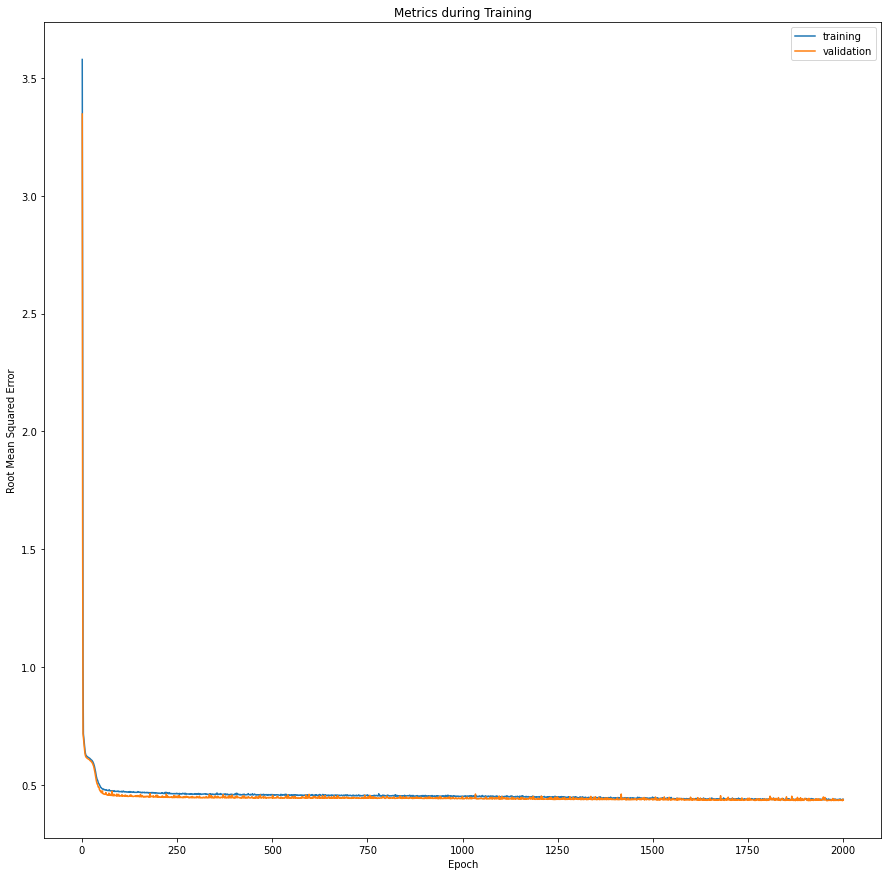

In [23]:
# Plot Loss: Root mean square error
xaxis=np.arange(1,2001)
plt.figure(figsize=(15,15))
plt.plot(xaxis,m1.history['root_mean_squared_error'],label='training')
plt.plot(xaxis,m1.history['val_root_mean_squared_error'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.title('Metrics during Training')
plt.legend()
plt.show()

In [24]:
y_pred=model1.predict(X_test)

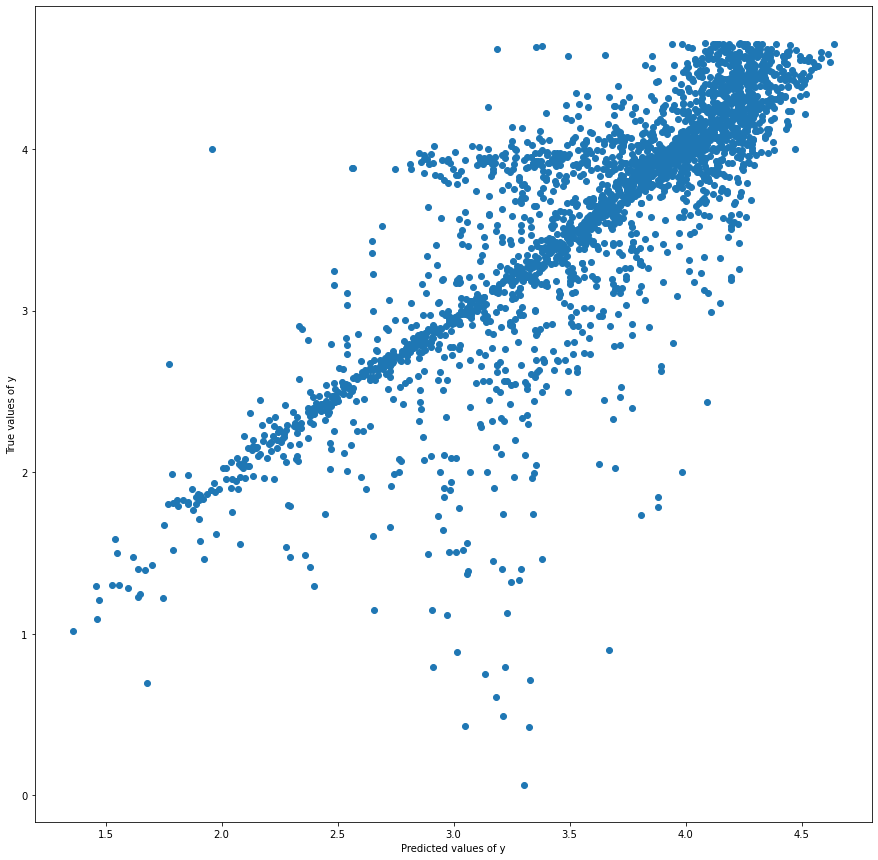

In [25]:
# Plot predicted values to actual values for comparison
plt.figure(figsize=(15,15))
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted values of y')
plt.ylabel('True values of y')
plt.show()

In [26]:
# R2 score for evaluation
r2=r2_score(y_test,y_pred)
print(r2)

0.6955858637277194


In [27]:
# Mean Squared Error for the test data set
print(mean_squared_error(y_test,y_pred))

0.18331158
